In [1]:
from dataset import SequenceDataset, PredDataset
from model import LSTM, Transformer, DLinear
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random
import sqlite3 as db
import matplotlib.pyplot as plt

In [2]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [3]:
con = db.connect('database.db')
coins = pd.read_sql_query('select coin from coins', con).coin.values

In [4]:
coins

array(['BTC', 'ETH', 'BNB', 'XRP', 'DOGE', 'LTC', 'SOL', 'SHIB', 'MATIC'],
      dtype=object)

In [5]:
btc = pd.read_sql_query('select * from BTC', con)

In [6]:
btc.rename(columns = {'index':'Date'}, inplace = True)
btc.Date = pd.to_datetime(btc.Date)

In [7]:
btc.set_index('Date', inplace=True)

BTC
Epoch: 0, train loss: 0.00882
Epoch: 1, train loss: 0.00212
Epoch: 2, train loss: 0.00172
Epoch: 3, train loss: 0.00163
Epoch: 4, train loss: 0.00145
Epoch: 0, train loss: 0.02994
Epoch: 1, train loss: 0.00499
Epoch: 2, train loss: 0.00352
Epoch: 3, train loss: 0.00265
Epoch: 4, train loss: 0.00214
Epoch: 0, train loss: 0.03149
Epoch: 1, train loss: 0.00332
Epoch: 2, train loss: 0.00232
Epoch: 3, train loss: 0.00199
Epoch: 4, train loss: 0.00176
test loss: 0.00291
test loss: 0.00386
test loss: 0.00347


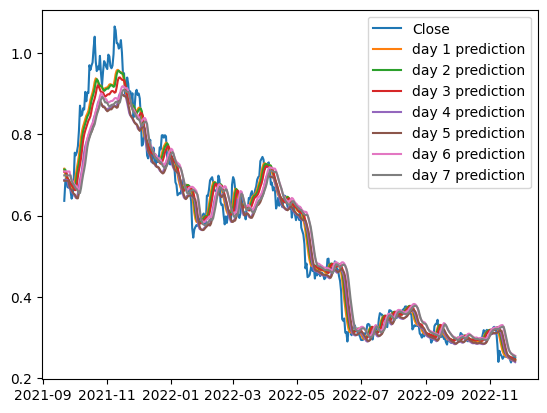

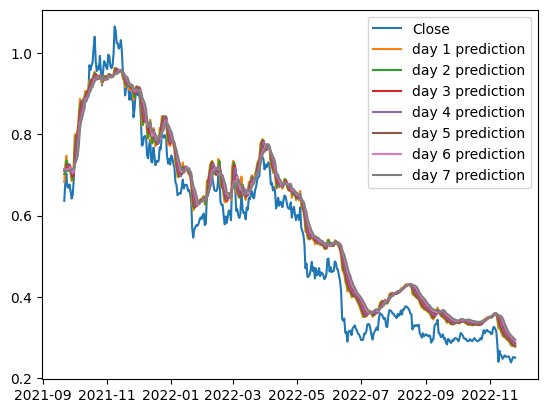

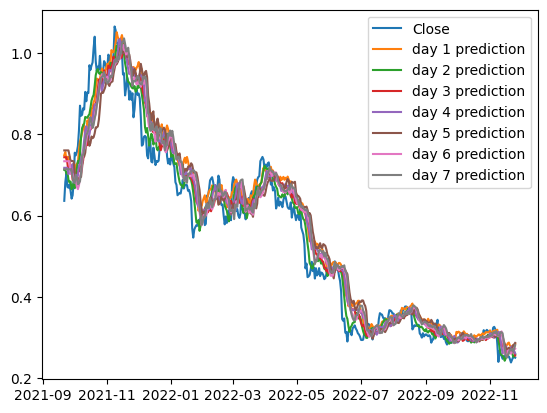

ETH
Epoch: 0, train loss: 0.00951
Epoch: 1, train loss: 0.00234
Epoch: 2, train loss: 0.00211
Epoch: 3, train loss: 0.00197
Epoch: 4, train loss: 0.00171
Epoch: 0, train loss: 0.06697
Epoch: 1, train loss: 0.00798
Epoch: 2, train loss: 0.00516
Epoch: 3, train loss: 0.00381
Epoch: 4, train loss: 0.00296
Epoch: 0, train loss: 0.05604
Epoch: 1, train loss: 0.00494
Epoch: 2, train loss: 0.00246
Epoch: 3, train loss: 0.00192
Epoch: 4, train loss: 0.00178
test loss: 0.00755
test loss: 0.00672
test loss: 0.00433


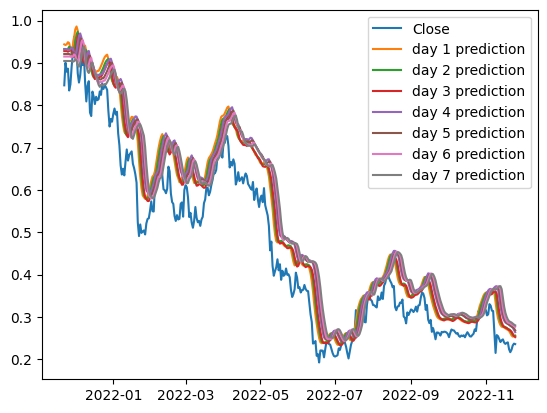

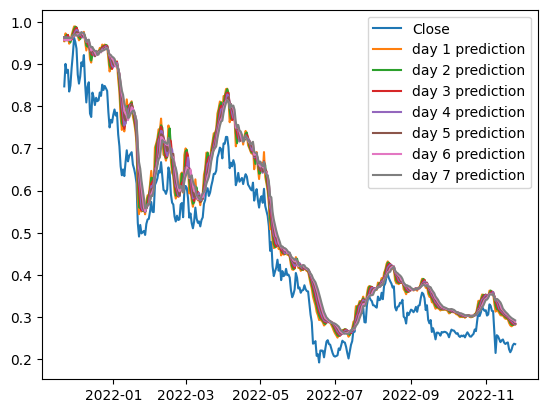

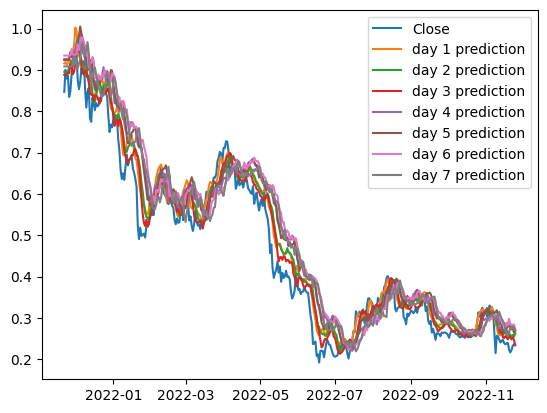

BNB
Epoch: 0, train loss: 0.01049
Epoch: 1, train loss: 0.00303
Epoch: 2, train loss: 0.00243
Epoch: 3, train loss: 0.00227
Epoch: 4, train loss: 0.00208
Epoch: 0, train loss: 0.04337
Epoch: 1, train loss: 0.00546
Epoch: 2, train loss: 0.00381
Epoch: 3, train loss: 0.00298
Epoch: 4, train loss: 0.00247
Epoch: 0, train loss: 0.03379
Epoch: 1, train loss: 0.00402
Epoch: 2, train loss: 0.00349
Epoch: 3, train loss: 0.00326
Epoch: 4, train loss: 0.00302
test loss: 0.00367
test loss: 0.00181
test loss: 0.00232


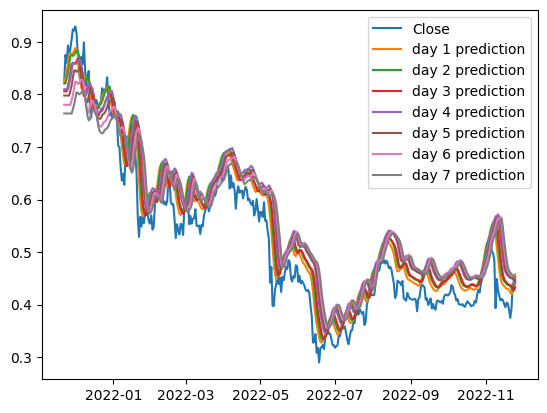

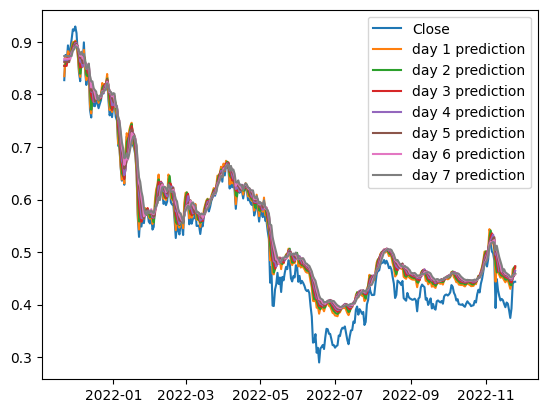

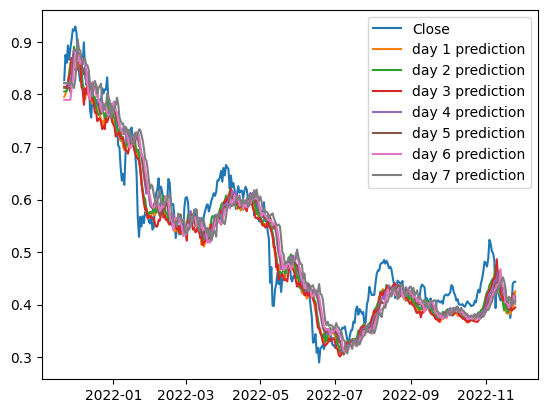

XRP
Epoch: 0, train loss: 0.00613
Epoch: 1, train loss: 0.00320
Epoch: 2, train loss: 0.00253
Epoch: 3, train loss: 0.00238
Epoch: 4, train loss: 0.00220
Epoch: 0, train loss: 0.04162
Epoch: 1, train loss: 0.00560
Epoch: 2, train loss: 0.00327
Epoch: 3, train loss: 0.00266
Epoch: 4, train loss: 0.00245
Epoch: 0, train loss: 0.04112
Epoch: 1, train loss: 0.00713
Epoch: 2, train loss: 0.00527
Epoch: 3, train loss: 0.00452
Epoch: 4, train loss: 0.00403
test loss: 0.00030
test loss: 0.00057
test loss: 0.00039


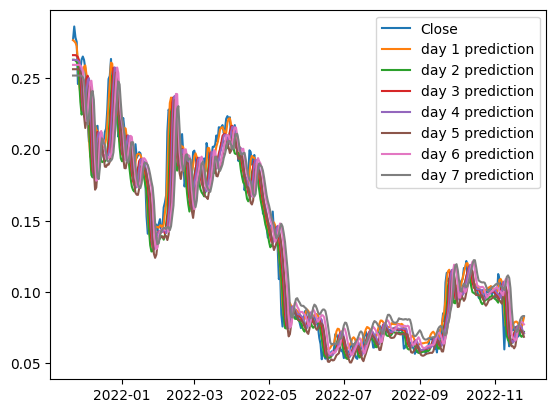

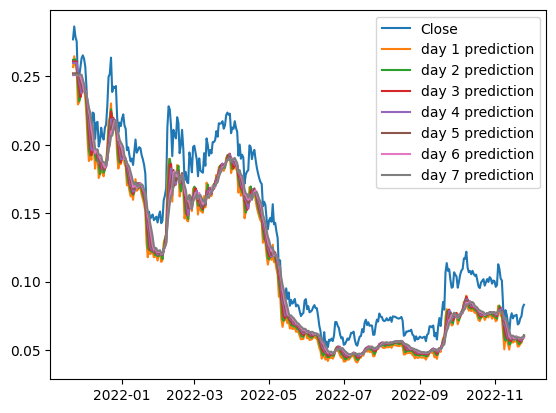

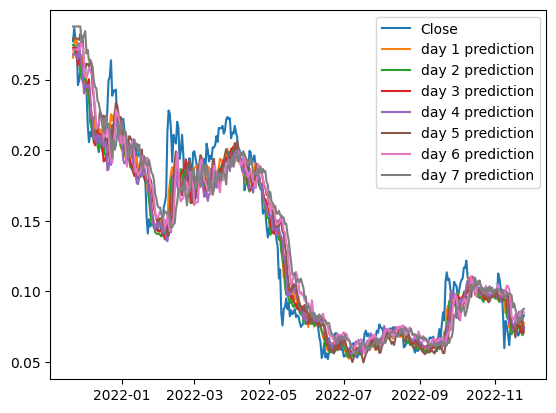

DOGE
Epoch: 0, train loss: 0.00647
Epoch: 1, train loss: 0.00234
Epoch: 2, train loss: 0.00209
Epoch: 3, train loss: 0.00192
Epoch: 4, train loss: 0.00193
Epoch: 0, train loss: 0.06200
Epoch: 1, train loss: 0.00664
Epoch: 2, train loss: 0.00387
Epoch: 3, train loss: 0.00277
Epoch: 4, train loss: 0.00253
Epoch: 0, train loss: 0.08388
Epoch: 1, train loss: 0.00882
Epoch: 2, train loss: 0.00246
Epoch: 3, train loss: 0.00214
Epoch: 4, train loss: 0.00205
test loss: 0.00178
test loss: 0.00453
test loss: 0.00046


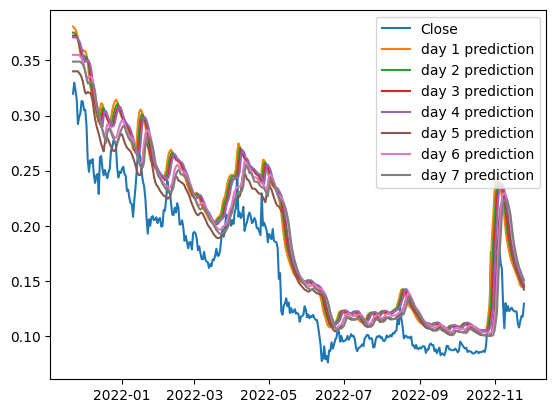

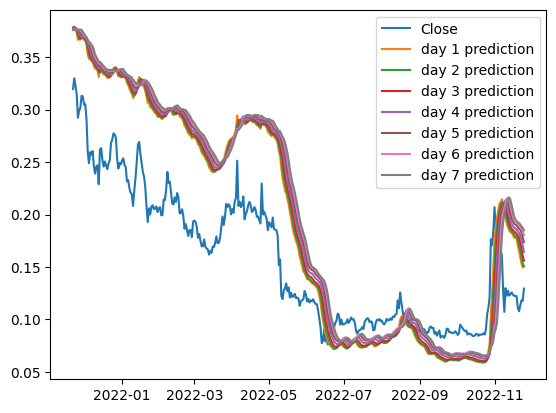

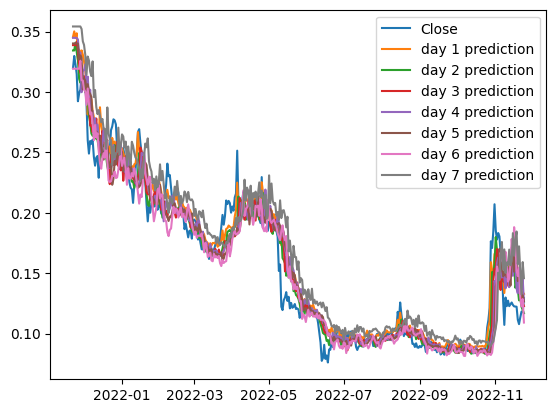

LTC
Epoch: 0, train loss: 0.00778
Epoch: 1, train loss: 0.00360
Epoch: 2, train loss: 0.00320
Epoch: 3, train loss: 0.00286
Epoch: 4, train loss: 0.00274
Epoch: 0, train loss: 0.03799
Epoch: 1, train loss: 0.00598
Epoch: 2, train loss: 0.00380
Epoch: 3, train loss: 0.00336
Epoch: 4, train loss: 0.00257
Epoch: 0, train loss: 0.05725
Epoch: 1, train loss: 0.00589
Epoch: 2, train loss: 0.00437
Epoch: 3, train loss: 0.00366
Epoch: 4, train loss: 0.00322
test loss: 0.00196
test loss: 0.00175
test loss: 0.00126


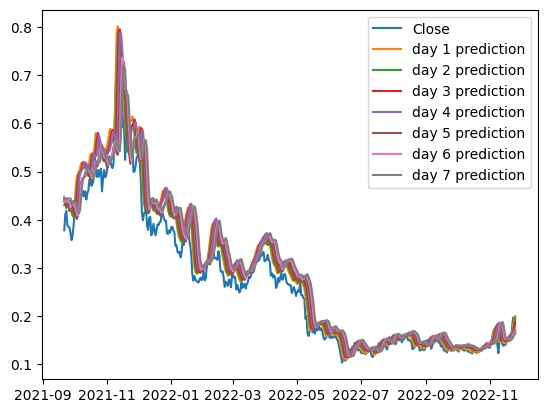

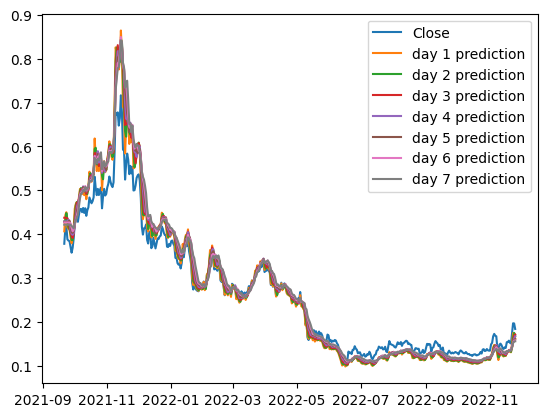

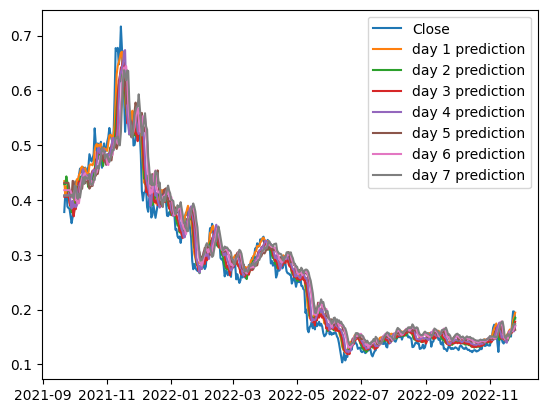

SOL
Epoch: 0, train loss: 0.02039
Epoch: 1, train loss: 0.00476
Epoch: 2, train loss: 0.00400
Epoch: 3, train loss: 0.00421
Epoch: 4, train loss: 0.00424
Epoch: 0, train loss: 0.08207
Epoch: 1, train loss: 0.01628
Epoch: 2, train loss: 0.01042
Epoch: 3, train loss: 0.00713
Epoch: 4, train loss: 0.00531
Epoch: 0, train loss: 0.05545
Epoch: 1, train loss: 0.01087
Epoch: 2, train loss: 0.00548
Epoch: 3, train loss: 0.00524
Epoch: 4, train loss: 0.00477
test loss: 0.00053
test loss: 0.00098
test loss: 0.00220


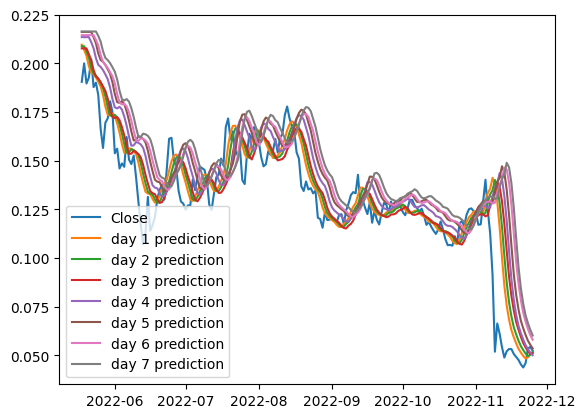

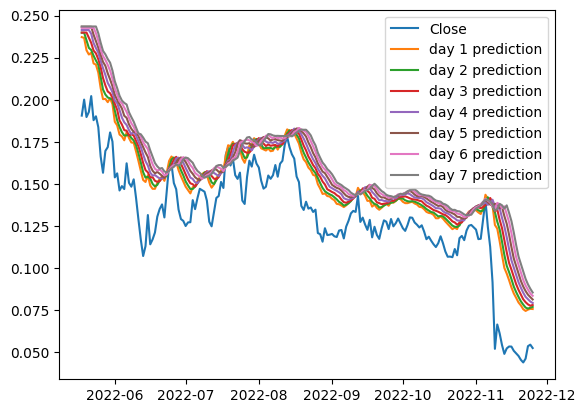

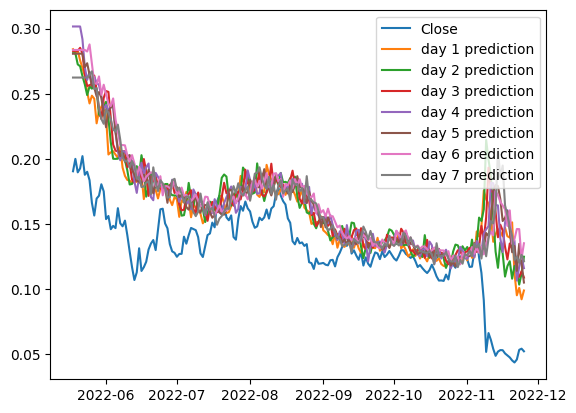

SHIB
Epoch: 0, train loss: 0.01543
Epoch: 1, train loss: 0.00607
Epoch: 2, train loss: 0.00504
Epoch: 3, train loss: 0.00503
Epoch: 4, train loss: 0.00455
Epoch: 0, train loss: 0.10590
Epoch: 1, train loss: 0.01564
Epoch: 2, train loss: 0.00893
Epoch: 3, train loss: 0.00605
Epoch: 4, train loss: 0.00591
Epoch: 0, train loss: 0.15021
Epoch: 1, train loss: 0.02564
Epoch: 2, train loss: 0.01260
Epoch: 3, train loss: 0.00800
Epoch: 4, train loss: 0.00612
test loss: 0.00050
test loss: 0.00367
test loss: 0.00055


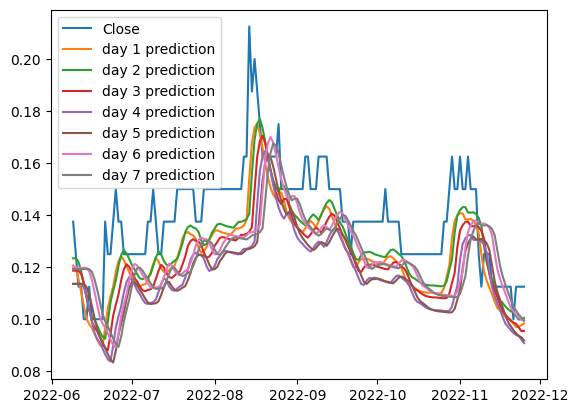

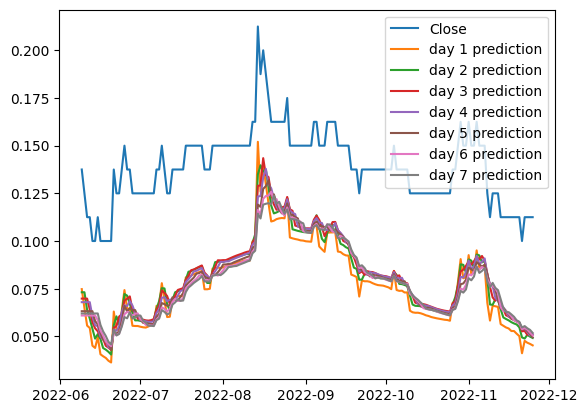

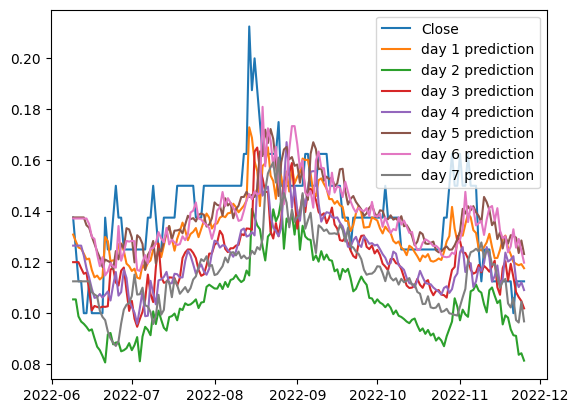

MATIC
Epoch: 0, train loss: 0.01149
Epoch: 1, train loss: 0.00396
Epoch: 2, train loss: 0.00349
Epoch: 3, train loss: 0.00319
Epoch: 4, train loss: 0.00334
Epoch: 0, train loss: 0.08047
Epoch: 1, train loss: 0.01253
Epoch: 2, train loss: 0.00688
Epoch: 3, train loss: 0.00732
Epoch: 4, train loss: 0.00419
Epoch: 0, train loss: 0.08332
Epoch: 1, train loss: 0.01627
Epoch: 2, train loss: 0.00635
Epoch: 3, train loss: 0.00468
Epoch: 4, train loss: 0.00423
test loss: 0.00626
test loss: 0.00264
test loss: 0.00314


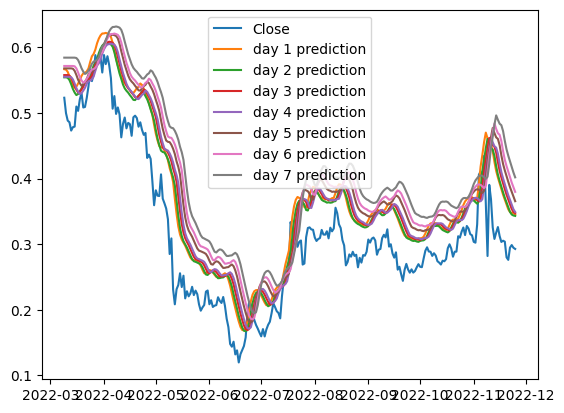

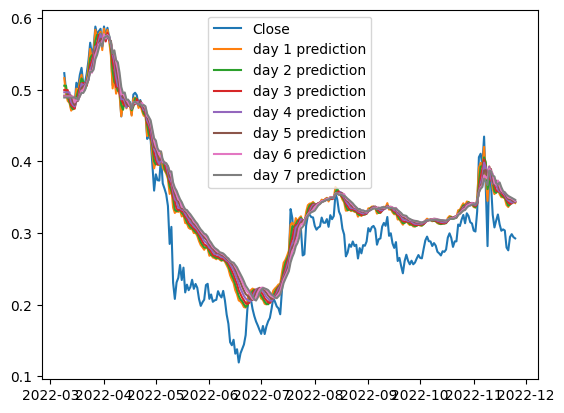

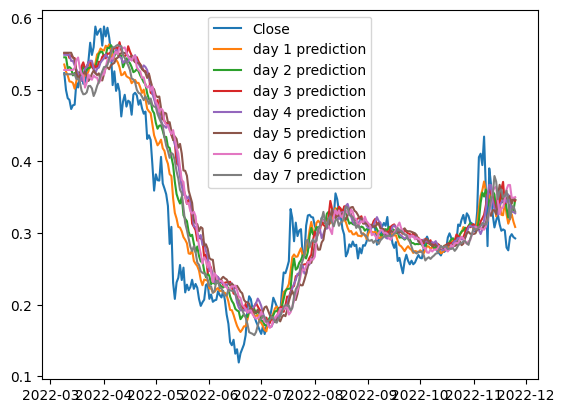

In [8]:
for coin in coins:
    print(coin)
    df = pd.read_sql_query('select * from ' + coin, con)
    df.rename(columns = {'index':'Date'}, inplace = True)
    df.Date = pd.to_datetime(df.Date)
    df.set_index('Date', inplace=True)
    target = 'Close'
    features = list(df.columns)
    train_size = int(len(df)*.8)
    train_df = df[:train_size+7]
    test_df = df[train_size-21:]
    scaled_train_df, scalers = scale_df(train_df)
    scaled_test_df = apply_scalers(test_df, scalers)
    train_dataset = SequenceDataset(scaled_train_df, target, features)
    test_dataset = PredDataset(scaled_test_df, target, features)
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
    
    n_epochs = 5
    learning_rate = 0.001
    lstm = LSTM()
    transformer = Transformer()
    dlinear = DLinear()
    loss_fn = torch.nn.MSELoss()
    optimiser1 = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    optimiser2 = torch.optim.Adam(transformer.parameters(), lr=learning_rate)
    optimiser3 = torch.optim.Adam(dlinear.parameters(), lr=learning_rate)
    
    train(n_epochs=n_epochs, model=lstm, optimiser=optimiser1, loss_fn=loss_fn, train_loader=train_loader)
    train(n_epochs=n_epochs, model=transformer, optimiser=optimiser2, loss_fn=loss_fn, train_loader=train_loader, model_type=1)
    train(n_epochs=n_epochs, model=dlinear, optimiser=optimiser3, loss_fn=loss_fn, train_loader=train_loader)
    
    preds1, loss1 = test(lstm, loss_fn, test_loader)
    preds2, loss2 = test(transformer, loss_fn, test_loader, model_type=1)
    preds3, loss3 = test(dlinear, loss_fn, test_loader)
    plot_test(scaled_test_df, preds1)
    plot_test(scaled_test_df, preds2)
    plot_test(scaled_test_df, preds3)
    
    torch.save(lstm,'models/' + coin + '_lstm')
    torch.save(transformer,'models/' + coin + '_transformer')
    torch.save(dlinear,'models/' + coin + '_dlinear')

In [9]:
con.close()